# PART 1: TESLA FINANCIAL ANALYSIS 

---

## Data Glossary
---

Source : https://www.kaggle.com/rpaguirre/tesla-stock-price/home

The subject matter of this dataset explores Tesla's stock price from 06/29/2010 to 03/17/2017

Within the dataset one will encounter the following:
1. The date - "__Date__"
2. The opening price of the stock - "__Open__"
3. The high price of that day - "__High__"
4. The low price of that day - "__Low__"
5. The closed price of that day - "__Close__"
6. The amount of stocks traded during that day - "__Volume__"
7. The stock's closing price that has been amended to include any distributions/corporate actions that occurs before next days open - "__Adj[usted] Close__"

**Importing necessary packages**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [80]:
#Creating a dataframe

df = pd.read_csv("tesla.csv", index_col='Date', parse_dates=True)
df.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
2010-07-09,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
2010-07-12,17.950001,18.070000,17.000000,17.049999,2202500,17.049999


## Exploratory Data Analysis 

Checking to see if there are any null values in the dataset

In [81]:
print(df.apply(lambda x:sum(x.isnull()),axis=0))

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


Looks like there are no null values in our dataset, so we move ahead with the plots. The following plot is to observe the general trend of the data. The '__Open__' and '__Close__' values have been included in the plot to give a brief overview of the difference between the prices at the start and at the end of the day during a particular year, which seems to be minimal as both the graphs almost seem to overlap. 

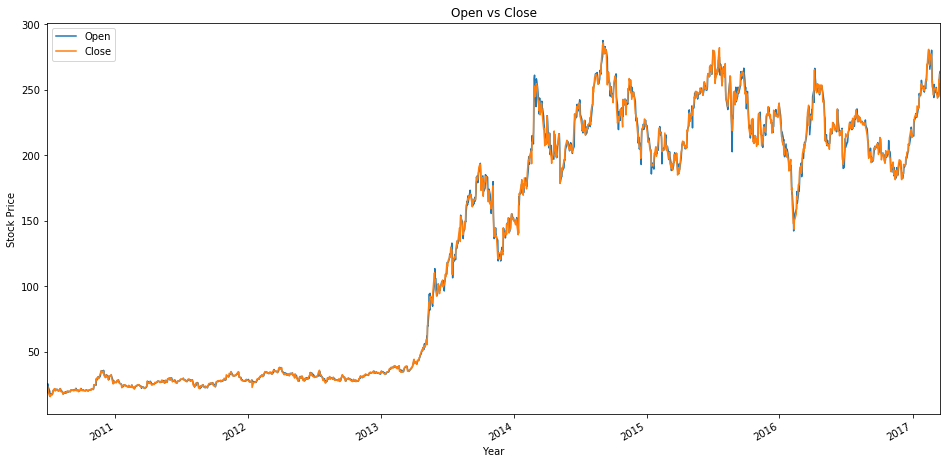

In [83]:
df['Open'].plot(figsize = (16,8), title = 'Open vs Close')
df['Close'].plot()
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()

However, the graph above is not that indicative of the trend, the tesla stocks follow. Now let's add in a rolling mean! This moving average method provides row entries, where every entry is then representative of the window.

## Moving Averages

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

Read more: Moving Average (MA) https://www.investopedia.com/terms/m/movingaverage.asp#ixzz5WJYMcOLM 

### Rolling
Lets start with a 7 day MA

In [27]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08,20.761429,22.655714,18.028571,19.750000,1.011600e+07,19.750000
2010-07-09,20.558571,21.641428,17.887142,18.822857,8.013757e+06,18.822857
2010-07-12,19.438571,19.877143,16.987143,17.854286,5.873100e+06,17.854286


Text(0,0.5,'Stock Price')

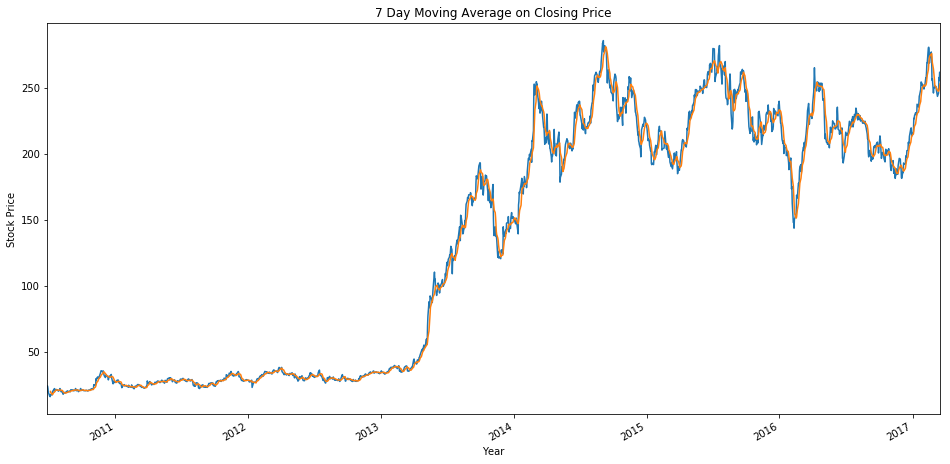

In [84]:
df['Close'].plot(figsize = (16,8), title = '7 Day Moving Average on Closing Price')
df.rolling(window=7).mean()['Close'].plot()
plt.xlabel('Year')
plt.ylabel('Stock Price')

Even with a 7 day MA, we are not quite clear about the trend of the stocks over 6 years. Let do this again with a __30 day MA__. 

Text(0,0.5,'Stock Price')

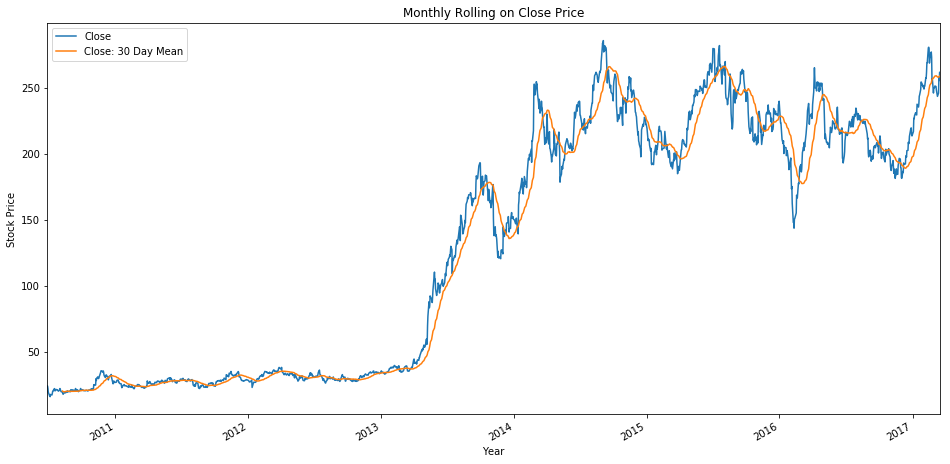

In [85]:
#Creating a column in the dataframe 
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

#plotting the moving average
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,8), title = 'Monthly Rolling on Close Price')
plt.xlabel('Year')
plt.ylabel('Stock Price')

### Expanding

Now what if you want to take into account everything from the start of the time series as a rolling value? For instance, not just take into account a period of 7 days, or a monthly rolling average, but instead, take into everything since the beginning of the time series, continuously. 

Text(0,0.5,'Stock Price')

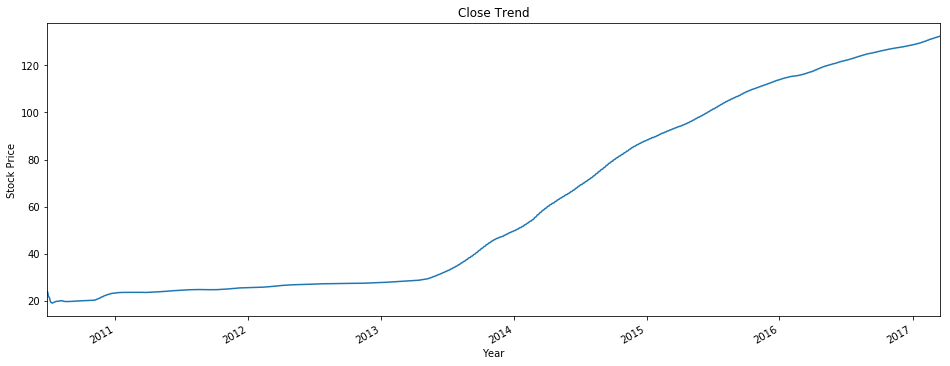

In [86]:
# Optional to specify a minimum number of periods
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6), title = 'Close Trend')
plt.xlabel('Year')
plt.ylabel('Stock Price')

## Moving Average vs. Exponentially weighted moving average (EWMA)

I just showed how to calculate the SMA based on some window.However, basic SMA has some "weaknesses".
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)

I will show you 2 plots ; one with SMA and one with EWMA, both having the same time window i.e 60 days.

Text(0,0.5,'Stock Price')

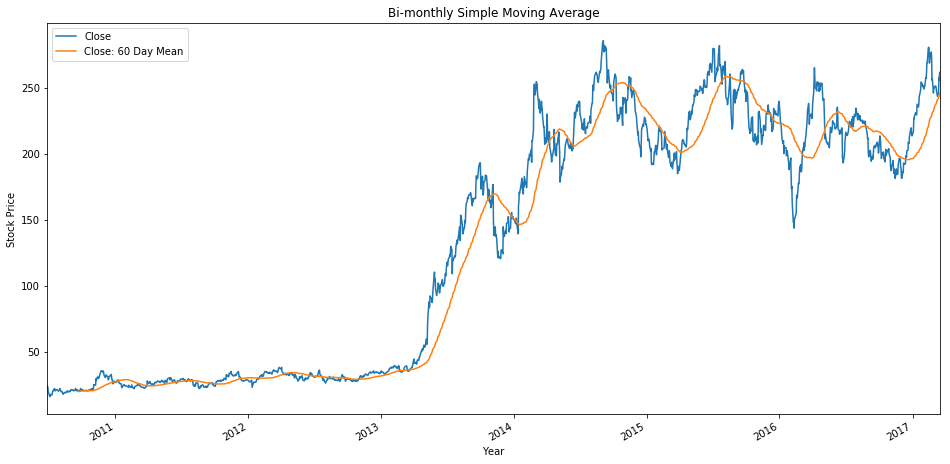

In [105]:
df['Close: 60 Day Mean'] = df['Close'].rolling(60).mean()
df[['Close','Close: 60 Day Mean']].plot(figsize=(16,8))

plt.title('Bi-monthly Simple Moving Average')
plt.xlabel('Year')
plt.ylabel('Stock Price')

Text(0,0.5,'Stock Price')

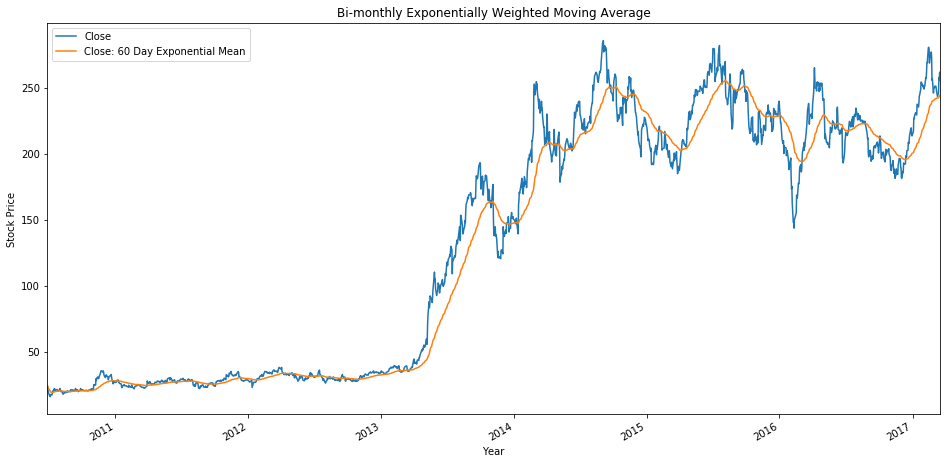

In [107]:
df['Close: 60 Day Exponential Mean'] = df['Close'].ewm(span=60).mean()
df[['Close','Close: 60 Day Exponential Mean']].plot(figsize=(16,8))

plt.title('Bi-monthly Exponentially Weighted Moving Average')
plt.xlabel('Year')
plt.ylabel('Stock Price')

Its quite clear from the plots above that EWMA is little more effective in terms of sticking towards the recent data points as it puts more weight on it, thus reducing the lag effect from SMA. 

## Mean opening price vs. Mean closing price 

Lets compare some yearly mean closing and opening prices to justify the trends we see in the plots above. We achieve this by doing __Time Resampling__.

*All possible time series offset strings:* 



<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [87]:
#Implementing a year end frequency
df['Open'].resample(rule='A').mean()


Date
2010-12-31     23.408000
2011-12-31     26.821984
2012-12-31     31.203120
2013-12-31    104.416428
2014-12-31    223.415397
2015-12-31    229.831944
2016-12-31    210.058452
2017-12-31    250.426539
Freq: A-DEC, Name: Open, dtype: float64

In [88]:
df['Close'].resample(rule='A').mean()

Date
2010-12-31     23.341846
2011-12-31     26.804762
2012-12-31     31.168600
2013-12-31    104.401230
2014-12-31    223.329088
2015-12-31    230.042898
2016-12-31    209.767262
2017-12-31    251.301924
Freq: A-DEC, Name: Close, dtype: float64

Text(0,0.5,'Stock Price')

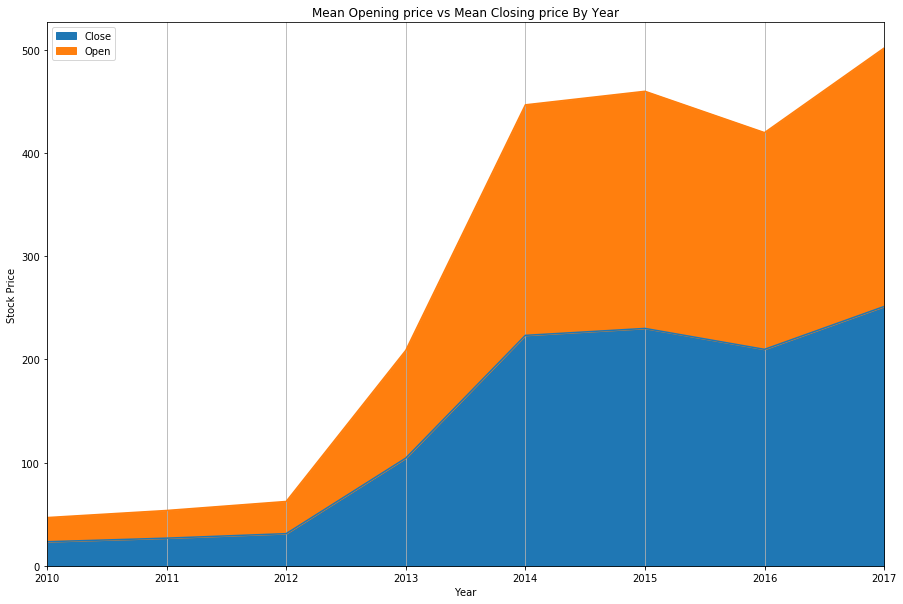

In [89]:
v=df[['Close','Open']]
v.resample('A').mean().plot.area(figsize = (15,10)).grid(True, which = 'minor')
plt.title('Mean Opening price vs Mean Closing price By Year')
plt.xlabel('Year')
plt.ylabel('Stock Price')

## Is the stock volatile?

### Bollinger Bands

More info : http://www.investopedia.com/terms/b/bollingerbands.asp

*Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify Tops and Bottoms or to determine the strength of the trend.*

*Bollinger Bands reflect direction with the 20-period SMA and volatility with the upper/lower bands. As such, they can be used to determine if prices are relatively high or low. According to Bollinger, the bands should contain 88-89% of price action, which makes a move outside the bands significant. Technically, prices are relatively high when above the upper band and relatively low when below the lower band. However, relatively high should not be regarded as bearish or as a sell signal. Likewise, relatively low should not be considered bullish or as a buy signal. Prices are high or low for a reason. As with other indicators, Bollinger Bands are not meant to be used as a stand alone tool. *

Text(0,0.5,'Stock Price')

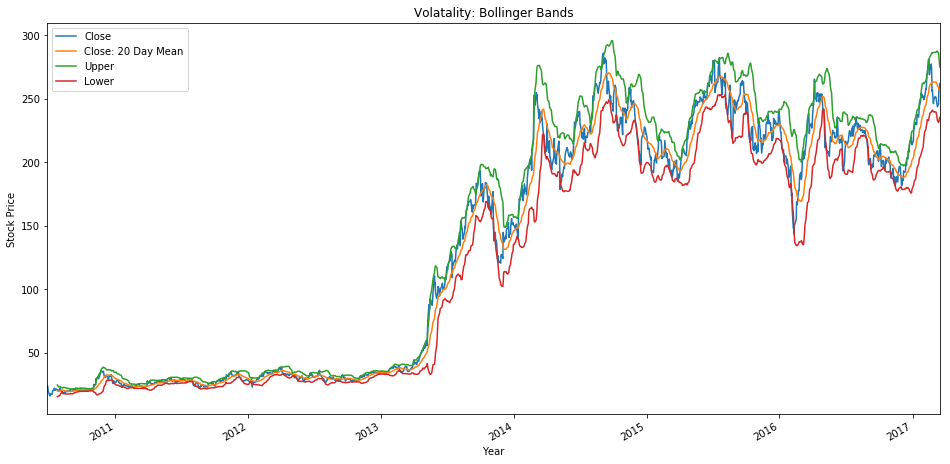

In [90]:
#calculating rolling mean
df['Close: 20 Day Mean'] = df['Close'].rolling(window=20).mean()

#bollinger bands
df['Upper'] = df['Close: 20 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 20 Day Mean'] - 2*df['Close'].rolling(window=20).std()

df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,8), title = 'Volatality: Bollinger Bands')

plt.xlabel('Year')
plt.ylabel('Stock Price')